In [1]:
import pandas as pd
from support.df_init import init

df = init()
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,regions_UNK,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,reviewsTotal
0,Carmencita,"(5, 6]",1894,1894.0,1.0,0,2089,1,10,2,...,0,0.399732,1,0,0,0,0,0,0,19
1,Un bon bock,"(5, 6]",1892,1892.0,12.0,0,183,1,10,2,...,0,0.046115,0,0,0,1,0,0,0,1
2,Chinese Opium Den,"(4, 5]",1894,1894.0,1.0,0,195,1,10,1,...,0,0.399732,1,0,0,0,0,0,0,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1894.0,1.0,1,2237,1,10,3,...,0,0.399732,1,0,0,0,0,0,0,22
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1896.0,1.0,0,13115,1,10,12,...,2,0.046115,0,0,0,1,0,0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,1993.0,96.0,0,11,1,10,0,...,0,0.001417,0,0,0,0,0,1,0,0
149527,Eco,"(6, 7]",2019,2019.0,14.0,0,15,1,10,4,...,0,0.017834,0,0,0,1,0,0,0,1
149528,Women Take Center Stage,"(5, 6]",2019,2019.0,NaN,0,12,1,10,2,...,0,0.000000,0,0,0,0,0,0,0,0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,2011.0,10.0,0,9,1,10,1,...,0,0.000000,0,0,0,0,0,0,0,0


In [2]:
df['runtimeMinutes']

0          1.0
1         12.0
2          1.0
3          1.0
4          1.0
          ... 
149526    96.0
149527    14.0
149528     NaN
149529    10.0
149530     NaN
Name: runtimeMinutes, Length: 149531, dtype: float64

In [3]:
# impute missing runtimeMinutes
from support.imputation import impute_runtime_minutes

impute_rt = impute_runtime_minutes(df)

# impute missing runtimeMinutes
df['runtimeMinutes'] = impute_rt(df)
df['runtimeMinutes']

0         17.0
1         12.0
2         17.0
3         17.0
4         17.0
          ... 
149526    96.0
149527    14.0
149528    30.0
149529    24.0
149530    45.0
Name: runtimeMinutes, Length: 149531, dtype: float64

In [4]:
from support.outlier_detection.isolation_trees_outlier_det import feats_to_keep_iso_forest as feats

df[feats].isnull().sum()

runtimeMinutes              0
totalCredits                0
reviewsTotal                0
numRegions                  0
ratingCount                 0
castNumber                  0
companiesNumber             0
averageRating               0
writerCredits               0
directorsCredits            0
totalMedia                  0
totalNominations            0
regions_freq_enc            0
regions_EU                  0
regions_NA                  0
regions_AS                  0
regions_AF                  0
regions_OC                  0
regions_SA                  0
regions_UNK                 0
countryOfOrigin_freq_enc    0
countryOfOrigin_NA          0
countryOfOrigin_AF          0
countryOfOrigin_AS          0
countryOfOrigin_EU          0
countryOfOrigin_OC          0
countryOfOrigin_SA          0
countryOfOrigin_UNK         0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
from support.outlier_detection.isolation_trees_outlier_det import classwise_iso_forest
from support.transformations import to_log, apply_log_scale

df_outliers = apply_log_scale(df)

scaler = StandardScaler()
df_outliers = df_outliers.dropna(subset=feats)
df_outliers[feats] = scaler.fit_transform(df_outliers[feats])

# Combine the results back into a single DataFrame
df_outliers['outlier_classwise'], _ = classwise_iso_forest(df_outliers)

df_outliers.groupby(['titleType', 'outlier_classwise']).size()

titleType     outlier_classwise
movie         -1                     371
               1                   36727
short         -1                     164
               1                   16214
tvEpisode     -1                     709
               1                   70121
tvMiniSeries  -1                      17
               1                    1602
tvMovie       -1                      61
               1                    5996
tvSeries      -1                      93
               1                    9112
tvShort       -1                       3
               1                     266
tvSpecial     -1                      12
               1                    1137
video         -1                      52
               1                    5097
videoGame     -1                      18
               1                    1759
dtype: int64

In [6]:
from support.outlier_detection.isolation_trees_outlier_det import global_iso_forest

df_outliers['outlier_global'], _ = global_iso_forest(df_outliers)

df_outliers.groupby(['titleType', 'outlier_global']).size()

titleType     outlier_global
movie         -1                 1086
               1                36012
short         -1                    1
               1                16377
tvEpisode      1                70830
tvMiniSeries  -1                   45
               1                 1574
tvMovie       -1                    3
               1                 6054
tvSeries      -1                  353
               1                 8852
tvShort        1                  269
tvSpecial     -1                    1
               1                 1148
video         -1                    7
               1                 5142
videoGame      1                 1777
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

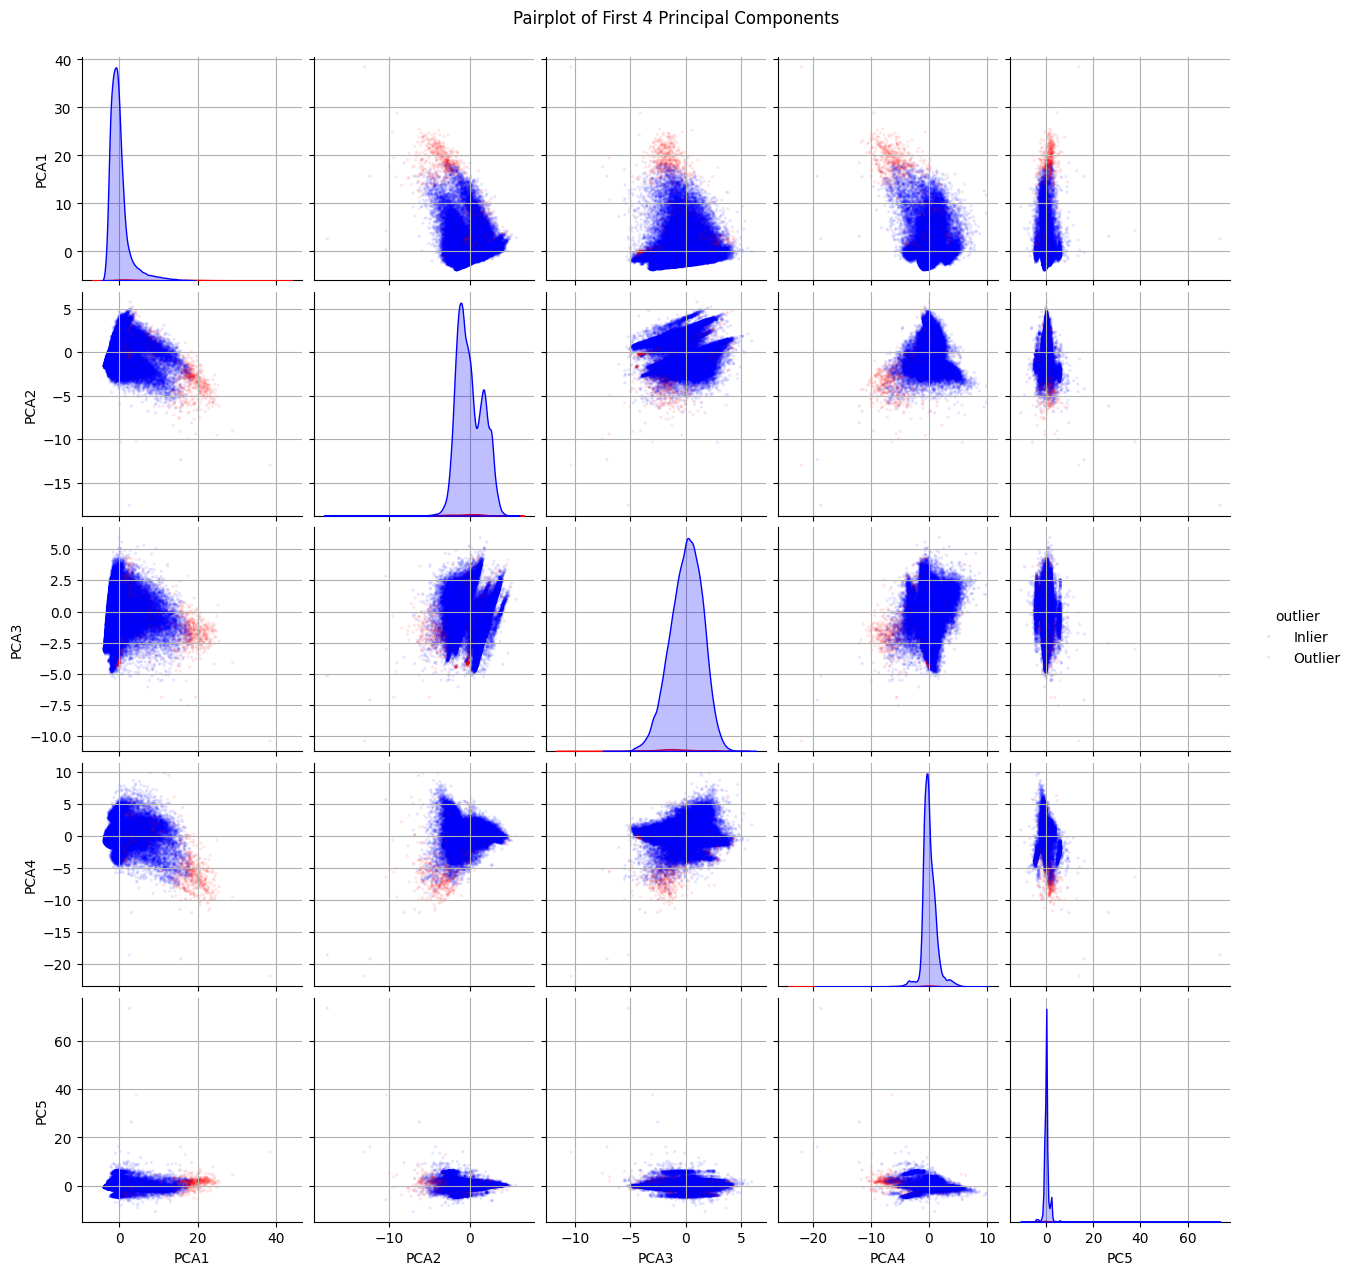

In [7]:
from support.outlier_detection.outlier_master import plot_3d_outliers, plot_pairplot_pca

plot_pairplot_pca(df_outliers, outlier_col='outlier_classwise', feats=feats)
# plot_3d_outliers(df_outliers, outlier_col='outlier_classwise', feats=feats)

In [8]:
# plot_3d_outliers(df_outliers, outlier_col='outlier_classwise', feats=feats)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

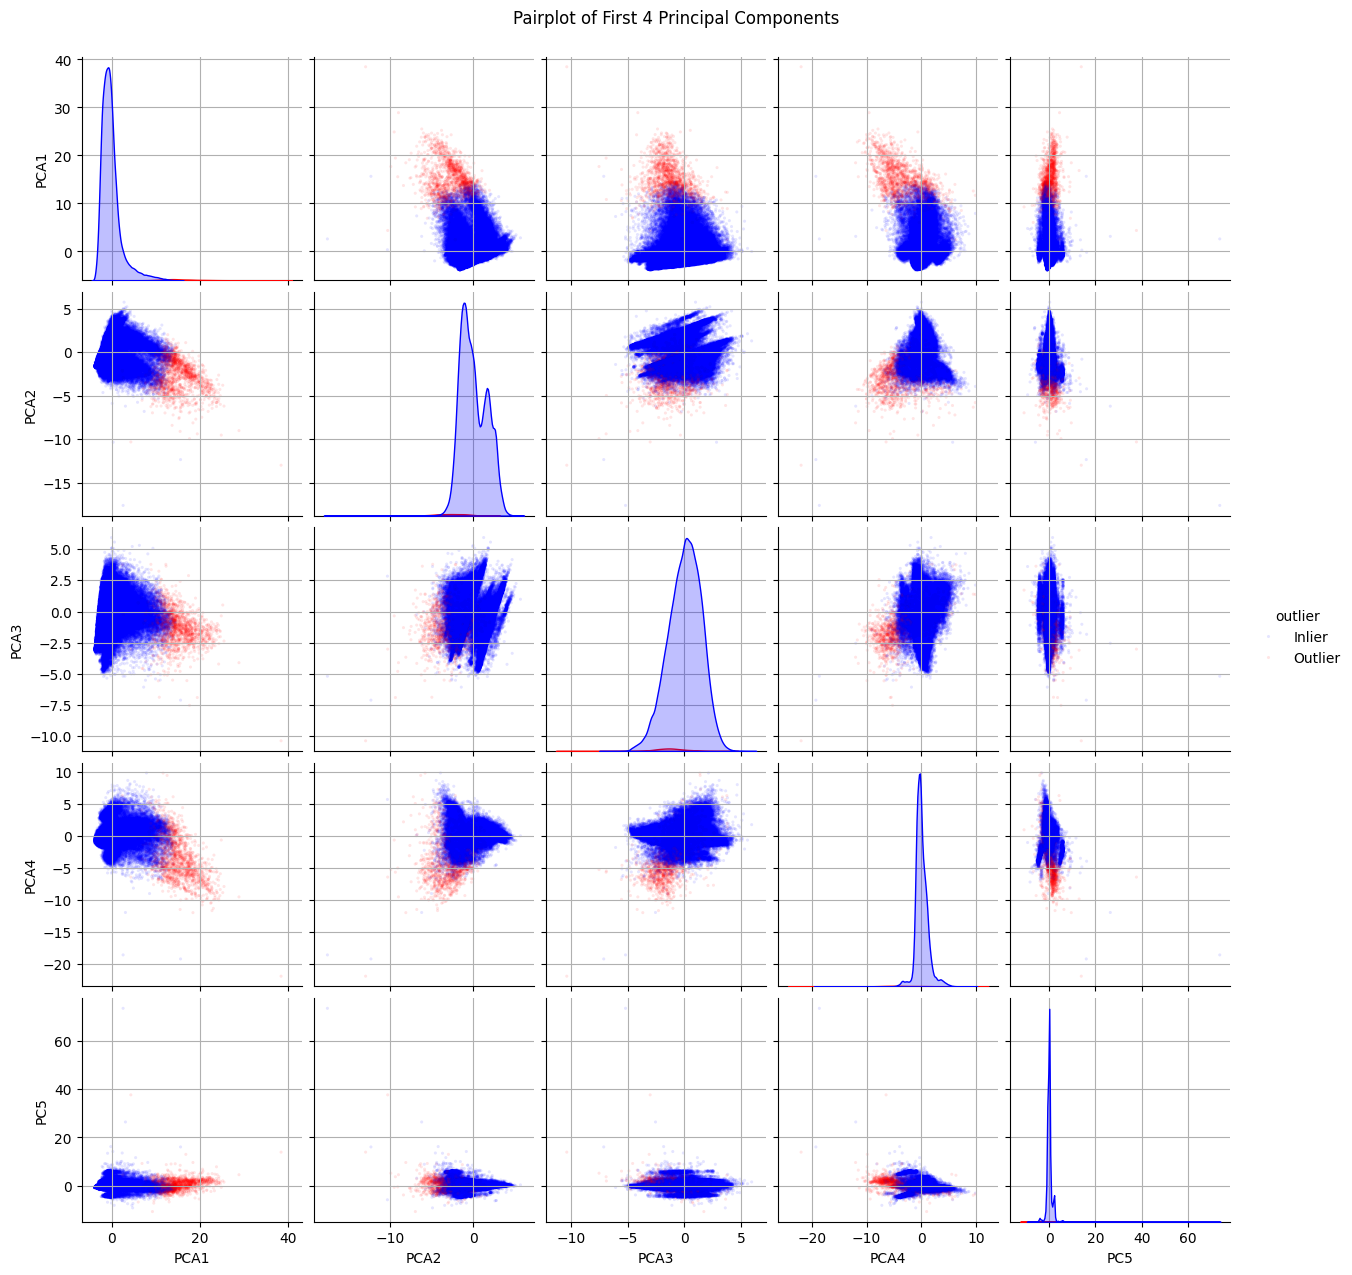

In [9]:
plot_pairplot_pca(df_outliers, outlier_col='outlier_global', feats=feats)
# plot_3d_outliers(df_outliers, outlier_col='outlier_global', feats=feats)

In [10]:
len(df), len(df_outliers)

(149531, 149531)

In [11]:
df['runtimeMinutes'].min(), df['runtimeMinutes'].max()

(8.0, 120.0)

runtimeMinutes bins:
['7 - 19', '19 - 30', '30 - 41', '41 - 52', '52 - 64', '64 - 75', '75 - 86', '86 - 97', '97 - 108', '108 - 120']


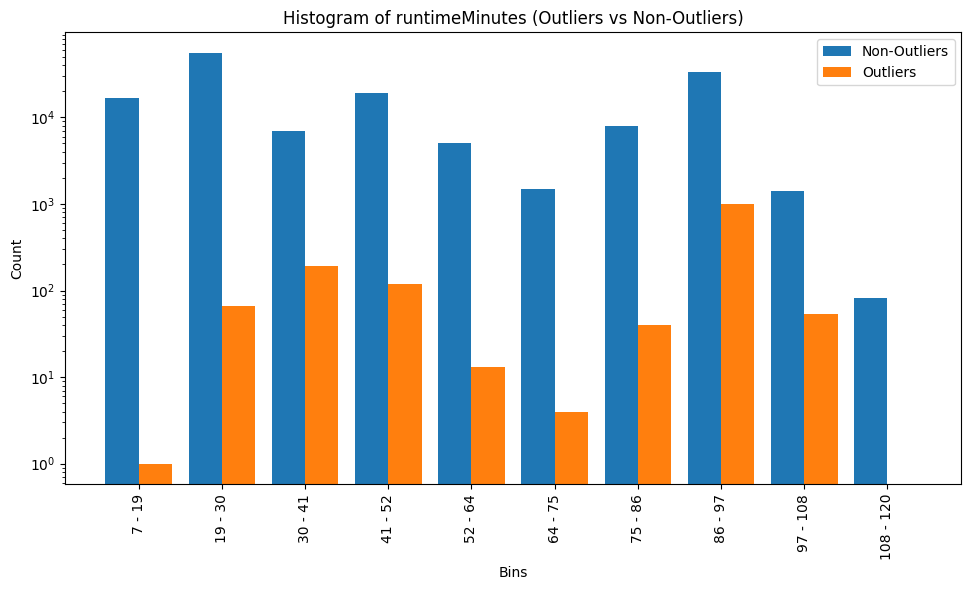

totalCredits bins:
['0 - 2521', '2521 - 5043', '5043 - 7565', '7565 - 10087', '10087 - 12609', '12609 - 15130', '15130 - 17652', '17652 - 20174', '20174 - 22696', '22696 - 25218']


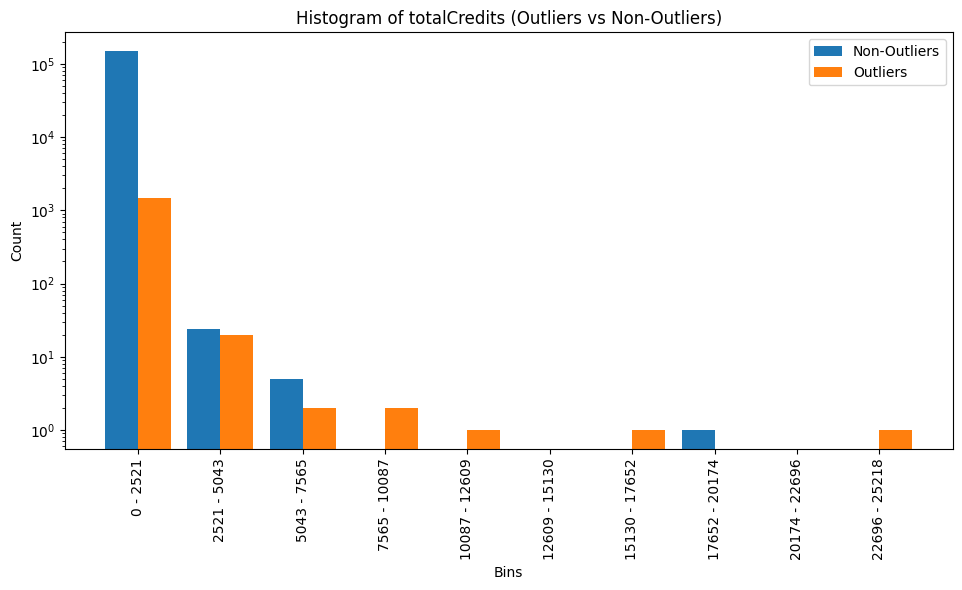

reviewsTotal bins:
['0 - 1146', '1146 - 2293', '2293 - 3440', '3440 - 4587', '4587 - 5734', '5734 - 6881', '6881 - 8028', '8028 - 9175', '9175 - 10322', '10322 - 11469']


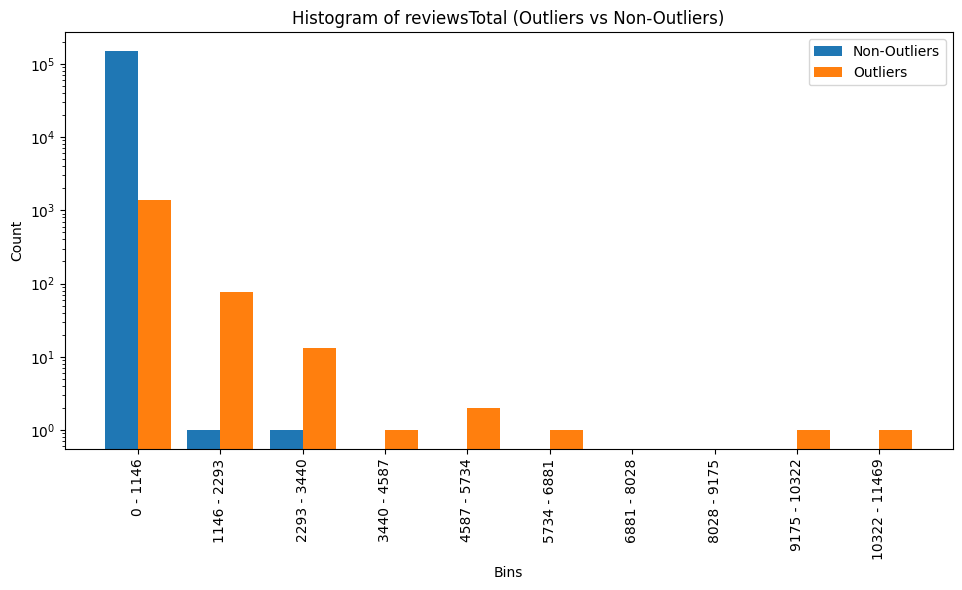

numRegions bins:
['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100']


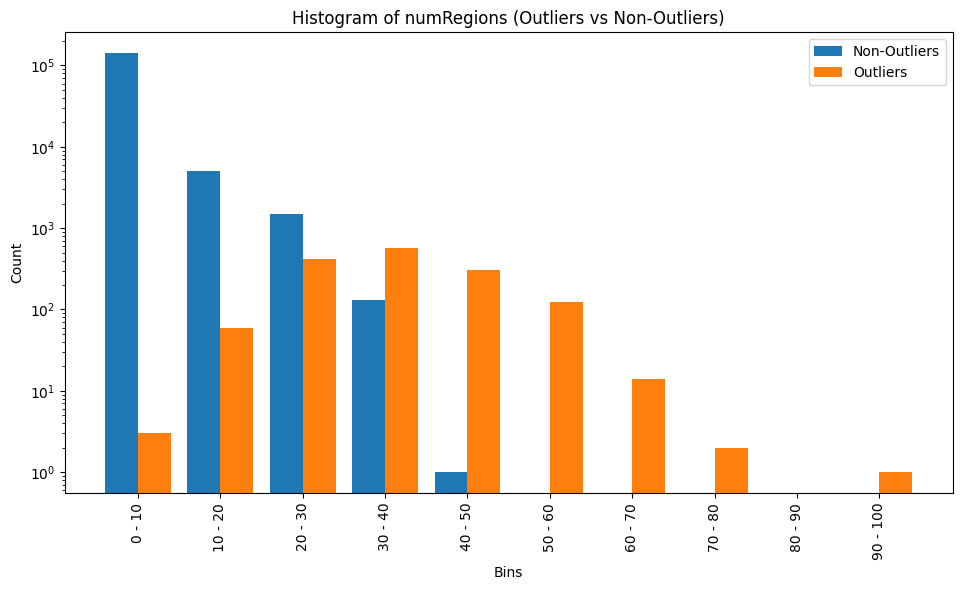

ratingCount bins:
['0 - 294883', '294883 - 589762', '589762 - 884640', '884640 - 1179519', '1179519 - 1474397', '1474397 - 1769276', '1769276 - 2064154', '2064154 - 2359033', '2359033 - 2653911', '2653911 - 2948790']


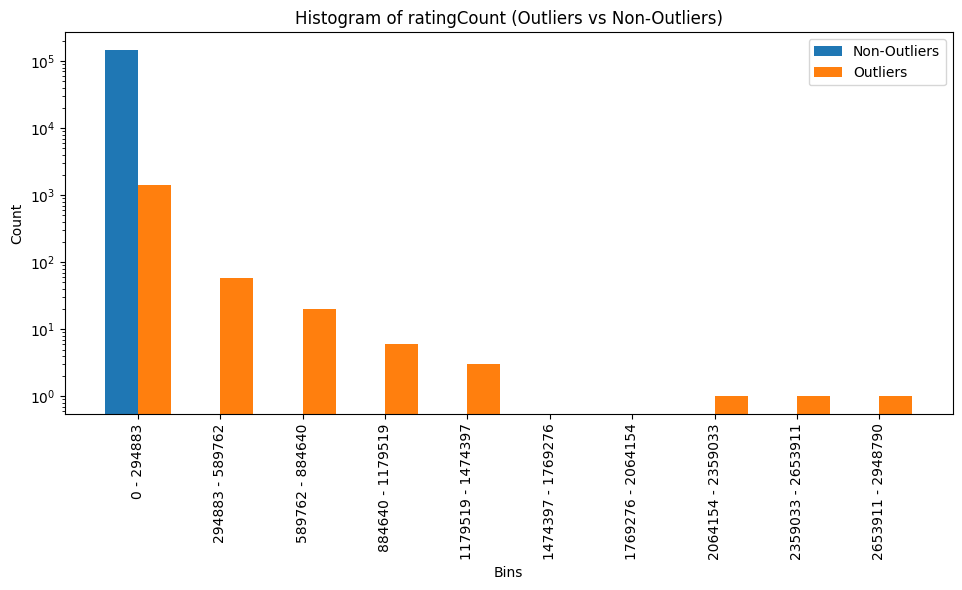

castNumber bins:
['0 - 1064', '1064 - 2129', '2129 - 3194', '3194 - 4259', '4259 - 5324', '5324 - 6389', '6389 - 7454', '7454 - 8519', '8519 - 9584', '9584 - 10649']


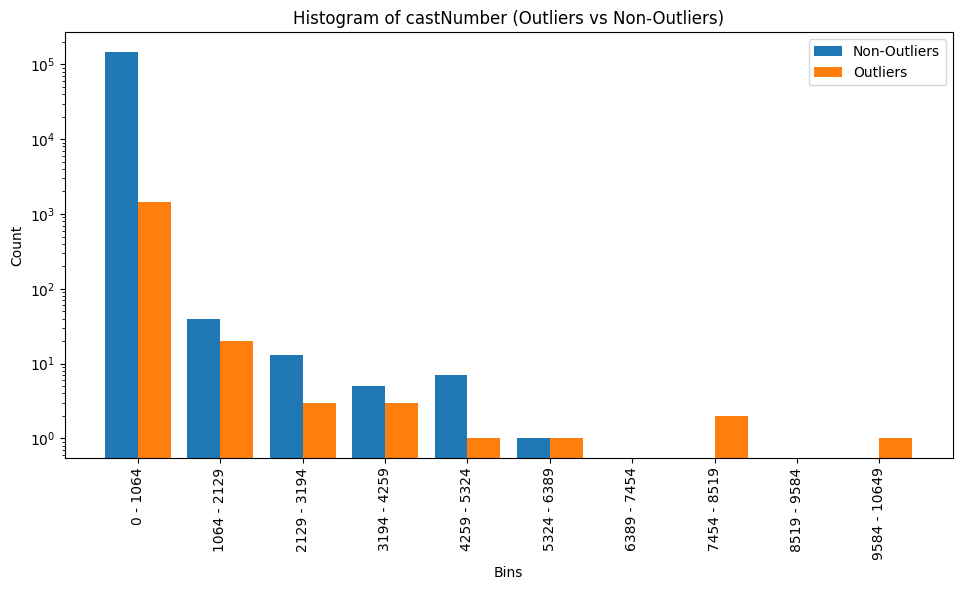

companiesNumber bins:
['0 - 59', '59 - 119', '119 - 179', '179 - 238', '238 - 298', '298 - 358', '358 - 417', '417 - 477', '477 - 537', '537 - 597']


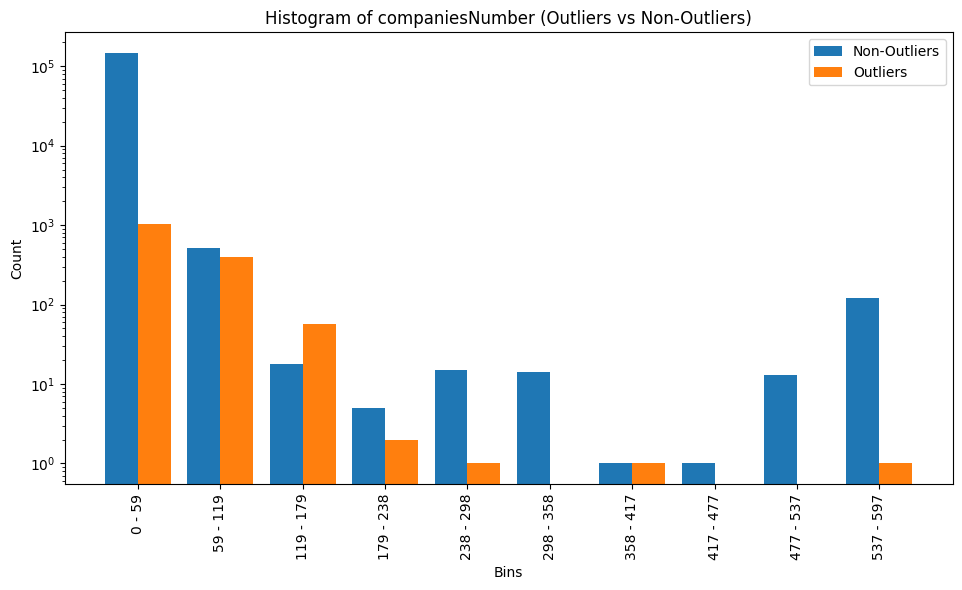

averageRating bins:
['1.0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8', '8 - 9', '9 - 10']


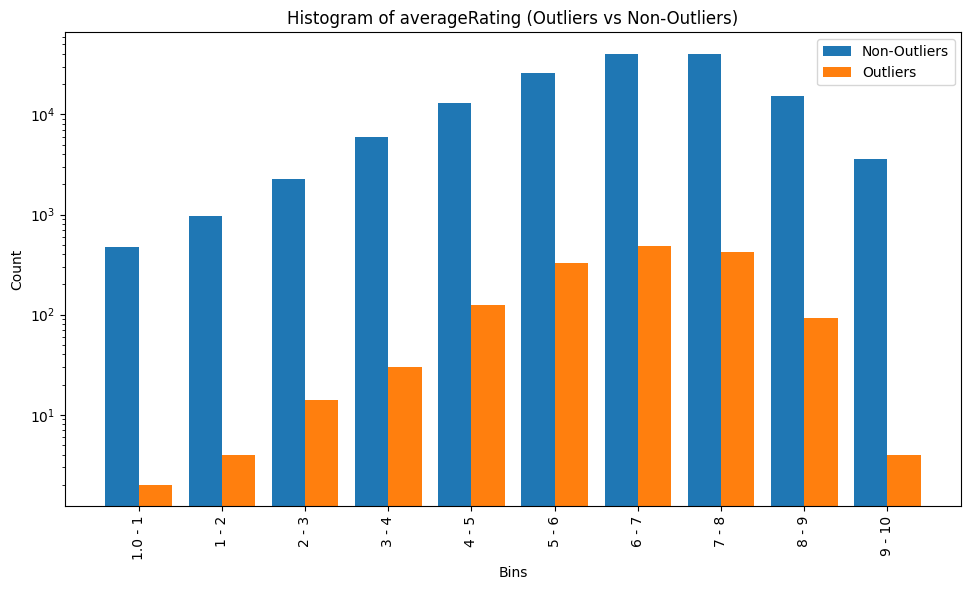

writerCredits bins:
['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 51']


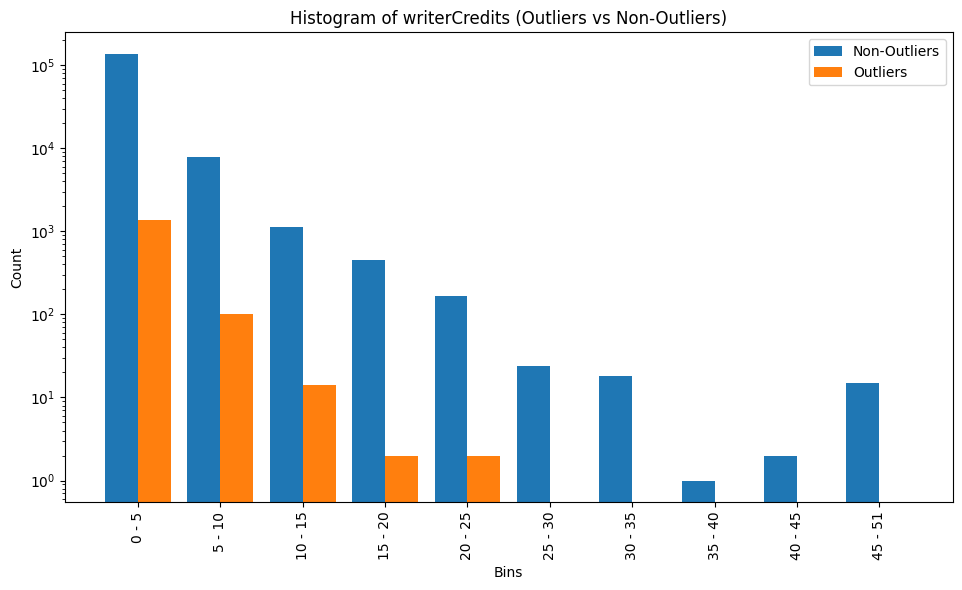

directorsCredits bins:
['0 - 5', '5 - 11', '11 - 17', '17 - 23', '23 - 29', '29 - 34', '34 - 40', '40 - 46', '46 - 52', '52 - 58']


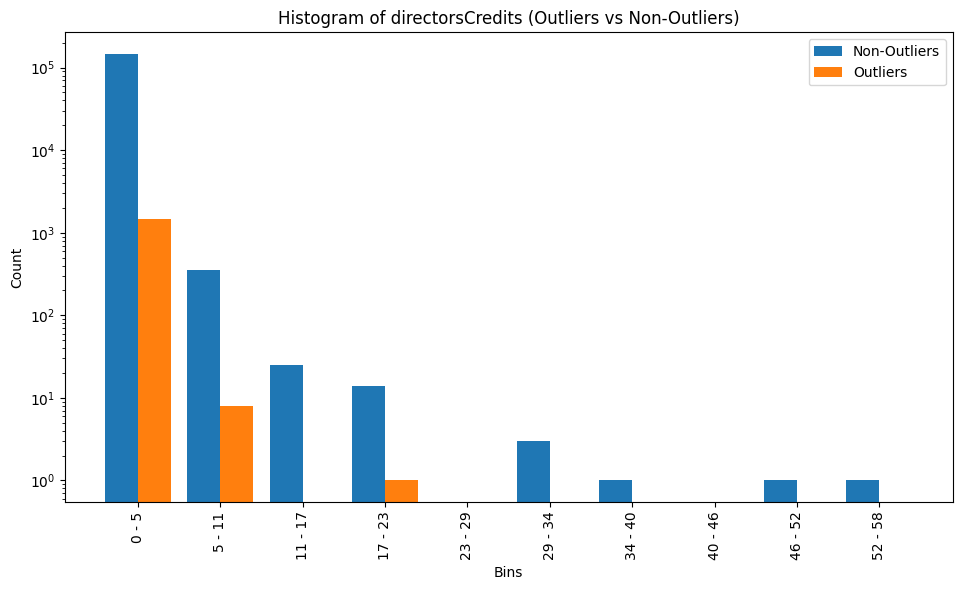

totalMedia bins:
['0 - 2066', '2066 - 4132', '4132 - 6198', '6198 - 8265', '8265 - 10331', '10331 - 12397', '12397 - 14464', '14464 - 16530', '16530 - 18596', '18596 - 20663']


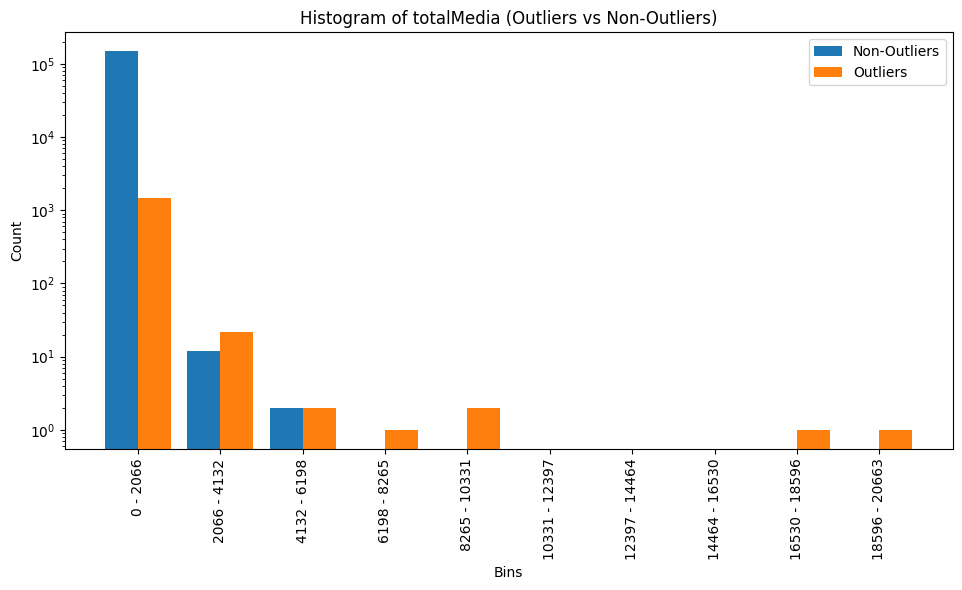

totalNominations bins:
['0 - 89', '89 - 178', '178 - 267', '267 - 357', '357 - 446', '446 - 535', '535 - 625', '625 - 714', '714 - 803', '803 - 893']


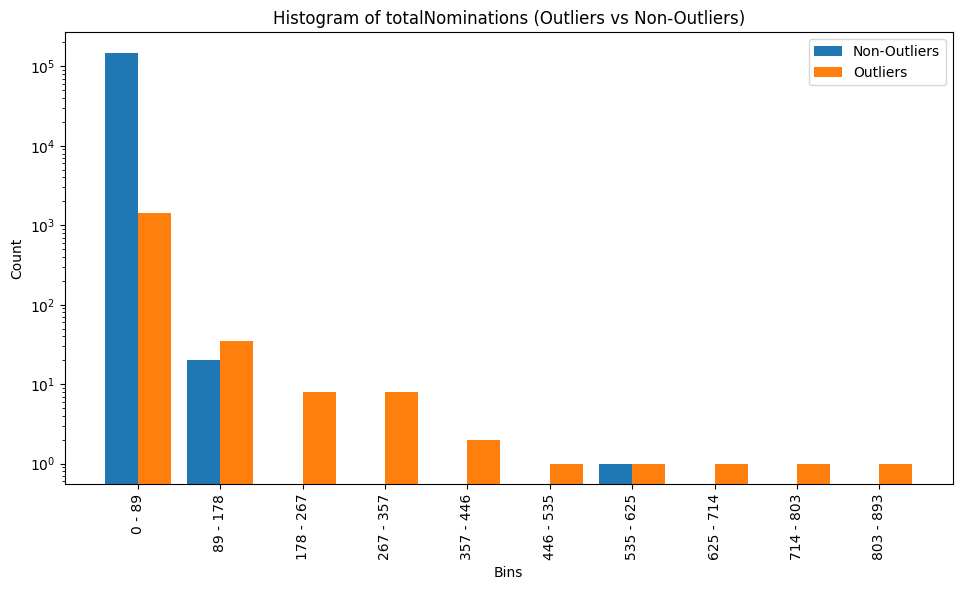

regions_freq_enc bins:
['0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4', '0.4 - 0.5', '0.5 - 0.6', '0.6 - 0.7', '0.7 - 0.8', '0.8 - 0.9', '0.9 - 1.0']


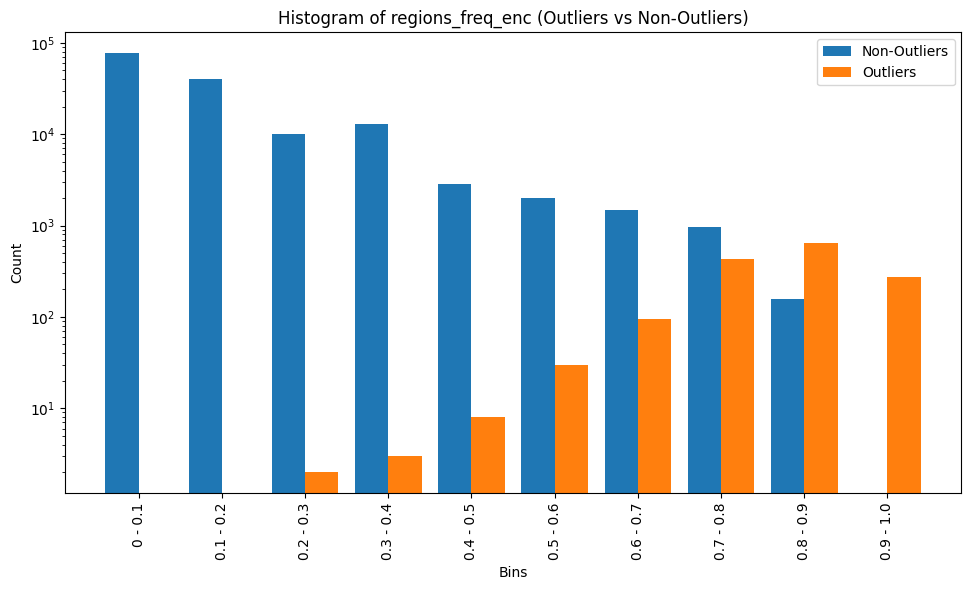

regions_EU bins:
['0 - 3', '3 - 7', '7 - 11', '11 - 15', '15 - 19', '19 - 23', '23 - 27', '27 - 31', '31 - 35', '35 - 39']


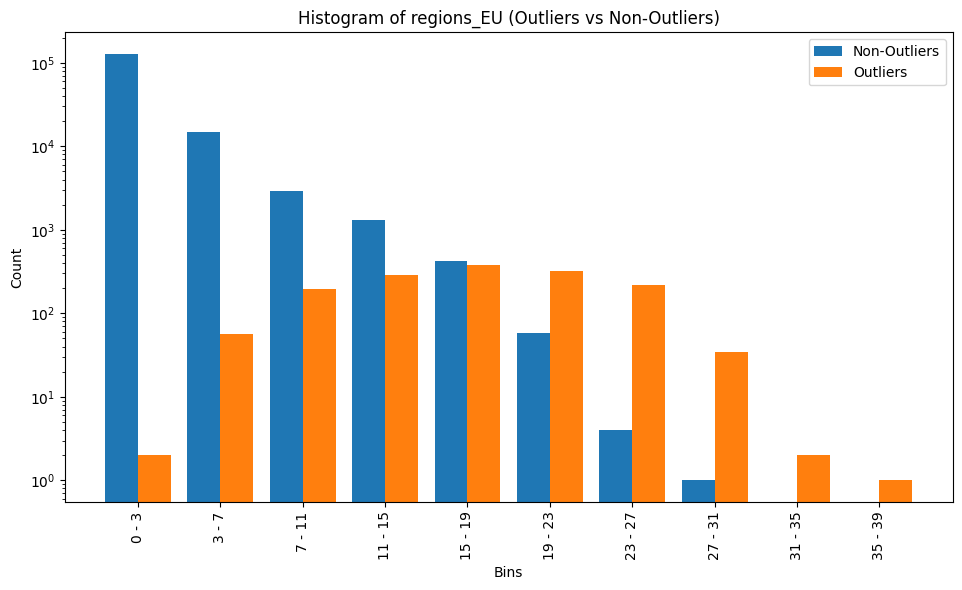

regions_NA bins:
['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8', '8 - 9', '9 - 10']


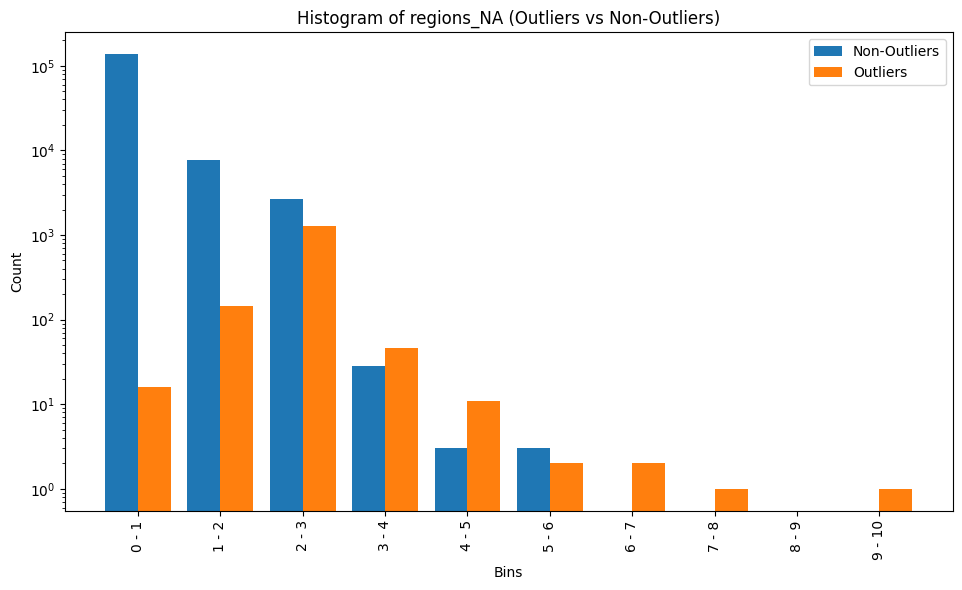

regions_AS bins:
['0 - 2', '2 - 4', '4 - 6', '6 - 9', '9 - 11', '11 - 13', '13 - 16', '16 - 18', '18 - 20', '20 - 23']


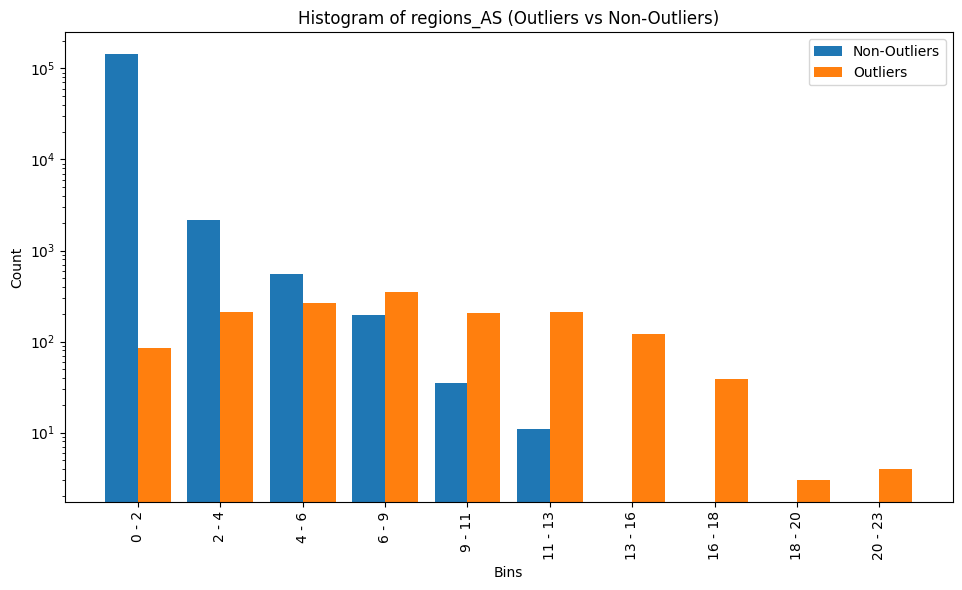

regions_AF bins:
['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 6', '6 - 7', '7 - 8', '8 - 9', '9 - 10', '10 - 12']


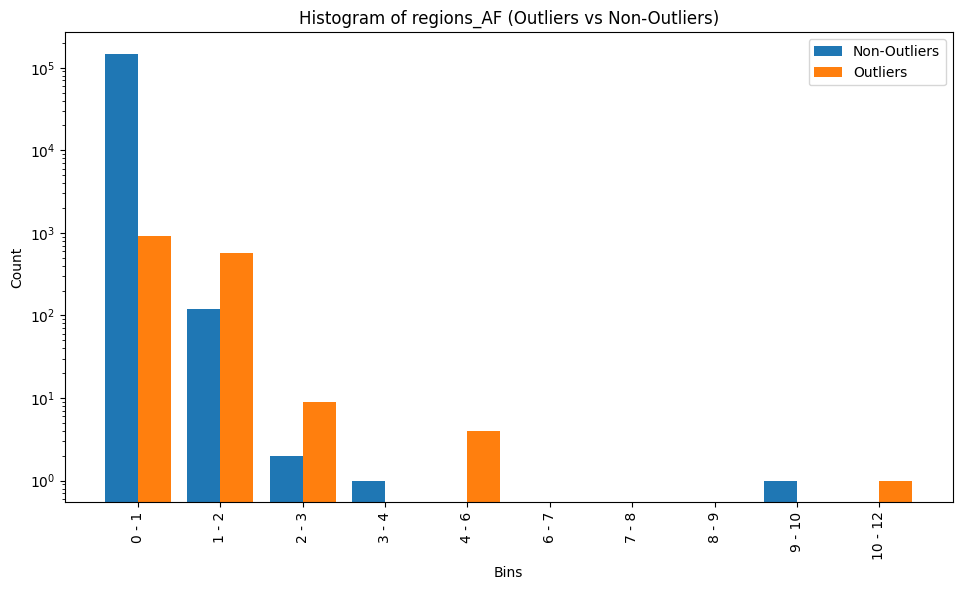

regions_OC bins:
['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1', '1 - 1', '1 - 1', '1 - 1', '1 - 1', '1 - 2']


ValueError: labels must be unique if ordered=True; pass ordered=False for duplicate labels

<Figure size 1000x600 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

# Define the outlier column to use
outlier_col = 'outlier_global'  # Change to 'outlier_classwise' or others if needed
df[outlier_col] = df_outliers[outlier_col]

# Loop through each feature in feats
for feature in feats:
    plt.figure(figsize=(10, 6))
    
    # Create bins for the histogram
    bins = pd.cut(df[feature], bins=10).unique()
    # Get the bin edges 
    bin_edges = bins.categories
    # Get the bin labels
    left_labels = ['0' if edge.left<0 else (
        f'{edge.left:.1f}' if edge.left<1 else f'{int(edge.left)}') for edge in bin_edges
    ]
    right_labels = [ f'{edge.right:.1f}' if edge.right<1 else f'{int(edge.right)}' for edge in bin_edges]
    bin_labels = [f'{left} - {right}' for left, right in zip(left_labels, right_labels)]
    # Create a new column in the DataFrame with the bin labels
    df_copy = df.copy()
    print(feature + ' bins:')
    print(bin_labels)
    df_copy[f'{feature}_bins'] = pd.cut(df[feature], bins=len(bin_labels), labels=bin_labels)

    non_outliers = df_copy[df[outlier_col] == 1][f'{feature}_bins'].value_counts().sort_index()
    outliers = df_copy[df[outlier_col] == -1][f'{feature}_bins'].value_counts().sort_index()
    # Plot the histogram
    plt.bar(non_outliers.index, non_outliers.values, label='Non-Outliers', align='edge', width=-0.4)
    plt.bar(outliers.index, outliers.values, label='Outliers', align='edge', width=+0.4)
    
    # Set the x-ticks to be the bin labels
    plt.xticks(rotation=90)
    plt.xlabel('Bins')
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature} (Outliers vs Non-Outliers)')
    plt.legend()
    plt.tight_layout()

    plt.yscale('log')
    plt.show()

In [10]:
from support.outlier_detection.isolation_trees_outlier_det import global_extended_iso_forest, classwise_extended_iso_forest

df_outliers['outlier_extended_global'], _ = global_extended_iso_forest(df_outliers)

df_outliers.groupby(['titleType', 'outlier_extended_global']).size()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21.0.3" 2024-04-16 LTS; OpenJDK Runtime Environment Temurin-21.0.3+9 (build 21.0.3+9-LTS); OpenJDK 64-Bit Server VM Temurin-21.0.3+9 (build 21.0.3+9-LTS, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/tmp37ri3_3_
  JVM stdout: /var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/tmp37ri3_3_/h2o_brunobarbieri_started_from_python.out
  JVM stderr: /var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/tmp37ri3_3_/h2o_brunobarbieri_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2OConnectionError: Unexpected HTTP error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:

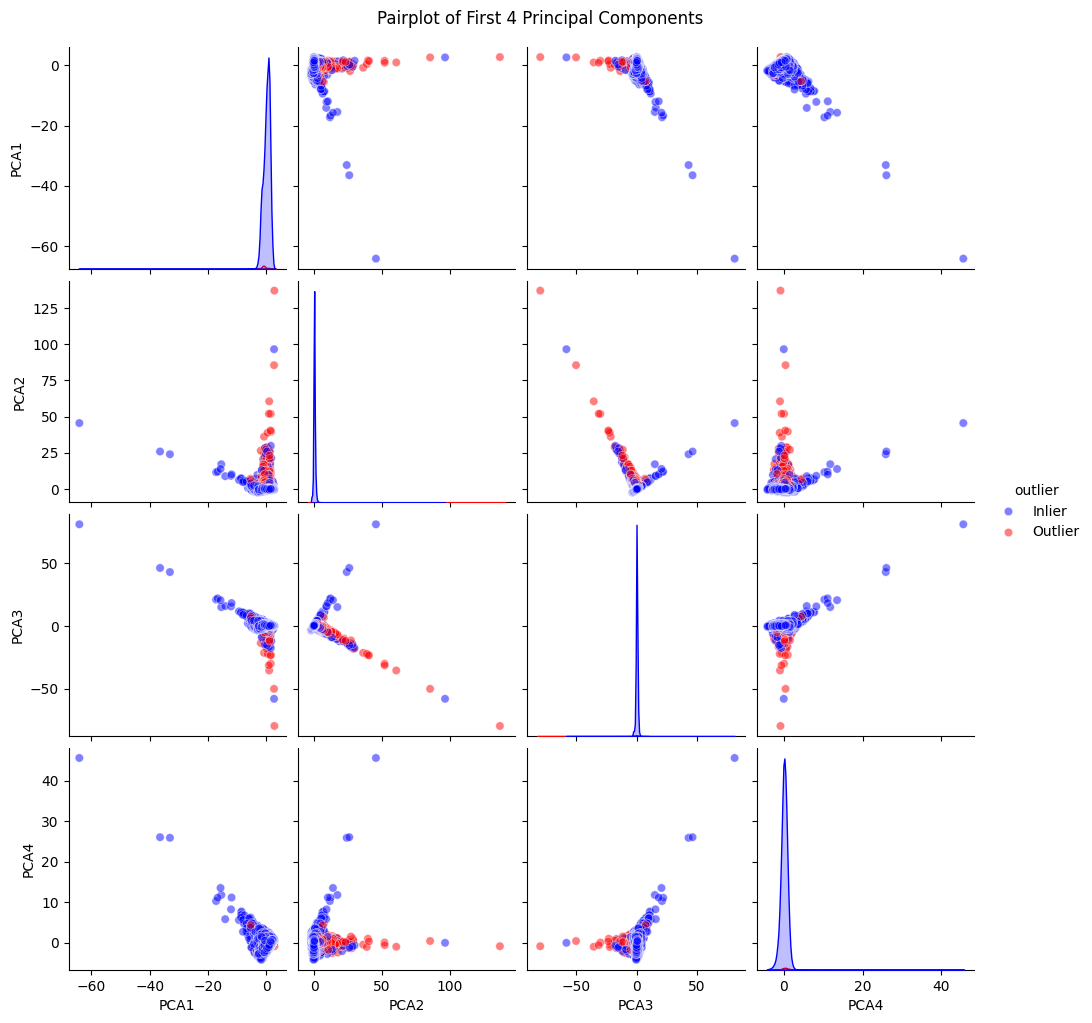

In [ ]:
plot_pairplot_pca(df_outliers, outlier_col='outlier_extended_global', feats=feats)
# plot_3d_outliers(df_outliers, outlier_col='outlier_extended_global', feats=feats)

In [ ]:
df_outliers['outlier_extended_classwise'], _ = classwise_extended_iso_forest(df_outliers)

df_outliers.groupby(['titleType', 'outlier_extended_classwise']).size()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21.0.3" 2024-04-16 LTS; OpenJDK Runtime Environment Temurin-21.0.3+9 (build 21.0.3+9-LTS); OpenJDK 64-Bit Server VM Temurin-21.0.3+9 (build 21.0.3+9-LTS, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/tmp_1e6j_ul
  JVM stdout: /var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/tmp_1e6j_ul/h2o_brunobarbieri_started_from_python.out
  JVM stderr: /var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/tmp_1e6j_ul/h2o_brunobarbieri_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Rome
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,"7 days, 21 hours and 21 minutes"
H2O_cluster_name:,H2O_from_python_brunobarbieri_tbiost
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.986 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning:

Dropping bad and constant columns: [directorsCredits, writerCredits]



██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning:

Dropping bad and constant columns: [directorsCredits, writerCredits]



██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




H2O session _sid_9b74 closed.


/Users/brunobarbieri/Documents/Uni/master/first/second_sem/dm2/dm2_project/support/outlier_detection/isolation_trees_outlier_det.py:216: H2ODeprecationWarning:

Deprecated, use ``h2o.cluster().shutdown()``.



titleType     outlier_extended_classwise
movie         -1                              438
               1                            36660
short         -1                              173
               1                            16205
tvEpisode     -1                              618
               1                            70212
tvMiniSeries  -1                               19
               1                             1600
tvMovie       -1                               51
               1                             6006
tvSeries      -1                              107
               1                             9098
tvShort       -1                                2
               1                              267
tvSpecial     -1                               12
               1                             1137
video         -1                               55
               1                             5094
videoGame     -1                               25
         

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:

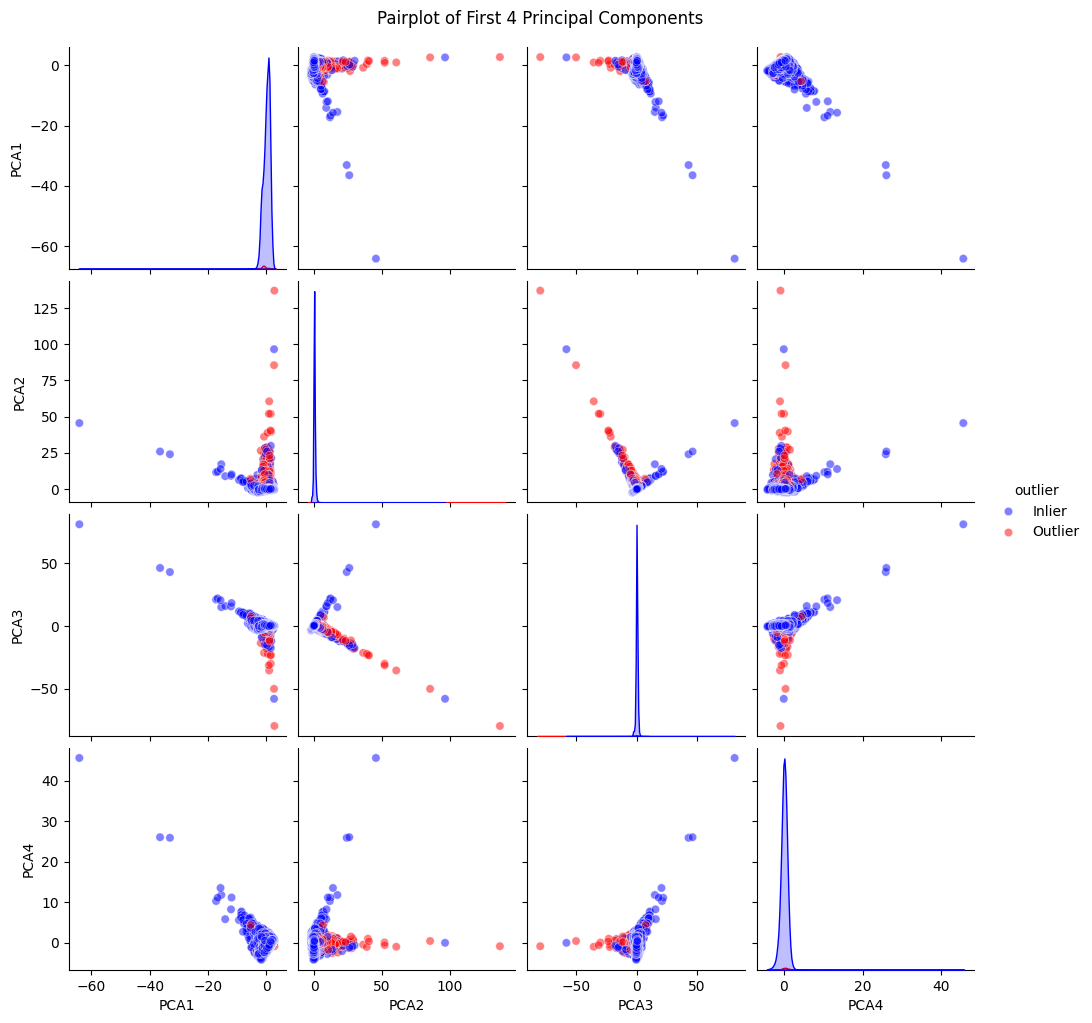

In [ ]:
plot_pairplot_pca(df_outliers, outlier_col='outlier_extended_global', feats=feats)
# plot_3d_outliers(df_outliers, outlier_col='outlier_extended_classwise', feats=feats)